In [3]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import  NoSuchWindowException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchWindowException
import requests
import time
from time import sleep
from bs4 import BeautifulSoup
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [3]:

driver = webdriver.Chrome()

url = 'https://www.fragrantica.com/designers/'

driver.get(url)

driver.implicitly_wait(10)

#driver.quit()



In [4]:
# Function that roll the page to the bottom and load more item (not relevent any more)
def rollPageDown():
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        while True:
            try:
                # Find the button by its tag name
                button = driver.find_element(By.XPATH, "//button[contains(text(),'Show more results')]")
                # Scroll to the bottom of the page
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                try:
                    # Wait for the button to be clickable
                    WebDriverWait(driver, 30).until(EC.element_to_be_clickable((By.XPATH, "//button[contains(text(),'Show more results')]")))
                except:
                    break
                # Click the button to load more results
                button.click()
                time.sleep(3)
            except NoSuchWindowException:
              print("The window or tab no longer exists.")
            break

In [5]:
links=[]
# find the parent div element that contains all the card sections
parent_div = driver.find_element(By.CSS_SELECTOR, 'div.grid-x:nth-child(5)')
print(parent_div.text)

# get all the div elements with class "designerlist cell small-6 large-4" under the parent div
card_sections = parent_div.find_elements(By.XPATH, './/div[@class="designerlist cell small-6 large-4"]')

# iterate through each desinger cell  and find its child div with class "href" to get the link
for section in card_sections:
    link_element = section.find_element(By.XPATH, './/a')
    links.append(link_element.get_attribute('href'))
driver.quit()

print(links)


Some of The Most Popular Designers
Acqua di Parma
84
Afnan
109
Ajmal
291
Al Haramain Perfumes
288
Al-Rehab
200
Amouage
126
Ariana Grande
13
Armaf
176
Atelier Cologne
54
Attar Collection
35
Avon
1248
Azzaro
99
BDK Parfums
18
Bath & Body Works
523
Boadicea the Victorious
172
Bond No 9
155
Britney Spears
35
Brocard
155
Burberry
89
Bvlgari
132
By Kilian
94
Byredo
73
Cacharel
80
Calvin Klein
186
Carolina Herrera
175
Cartier
123
Chanel
136
Chloé
55
Chopard
64
Clean
80
Comme des Garcons
101
Creed
93
Davidoff
100
Demeter Fragrance
424
Dior
270
Diptyque
83
Dolce&Gabbana
110
Donna Karan
172
Elie Saab
34
Elizabeth Arden
92
Escada
70
Escentric Molecules
22
Essential Parfums
8
Estée Lauder
142
Etat Libre d'Orange
51
Ex Nihilo
59
Frederic Malle
46
Giorgio Armani
221
Givenchy
265
Gucci
114
Guerlain
495
Hermès
126
Histoires de Parfums
48
Hugo Boss
129
Imaginary Authors
24
Initio Parfums Prives
17
Issey Miyake
111
Jean Paul Gaultier
149
Jimmy Choo
40
Jo Malone London
183
Juicy Couture
52
Juliette Has A

In [9]:
links

['https://www.fragrantica.com/designers/Acqua-di-Parma.html',
 'https://www.fragrantica.com/designers/Afnan.html',
 'https://www.fragrantica.com/designers/Ajmal.html',
 'https://www.fragrantica.com/designers/Al-Haramain-Perfumes.html',
 'https://www.fragrantica.com/designers/Al-Rehab.html',
 'https://www.fragrantica.com/designers/Amouage.html',
 'https://www.fragrantica.com/designers/Ariana-Grande.html',
 'https://www.fragrantica.com/designers/Armaf.html',
 'https://www.fragrantica.com/designers/Atelier-Cologne.html',
 'https://www.fragrantica.com/designers/Attar-Collection.html',
 'https://www.fragrantica.com/designers/Avon.html',
 'https://www.fragrantica.com/designers/Azzaro.html',
 'https://www.fragrantica.com/designers/BDK-Parfums.html',
 'https://www.fragrantica.com/designers/Bath-Body-Works.html',
 'https://www.fragrantica.com/designers/Boadicea-the-Victorious.html',
 'https://www.fragrantica.com/designers/Bond-No-9.html',
 'https://www.fragrantica.com/designers/Britney-Spears.h

In [19]:
#build a dataframe with the links
desingners_links_df = pd.DataFrame(links, columns=['links'])
#count how many duplicates are in the dataframe
print(desingners_links_df.duplicated().sum())

0


In [20]:
desingners_links_df

,links
0,https://www.fragrantica.com/designers/Acqua-di...
1,https://www.fragrantica.com/designers/Afnan.html
2,https://www.fragrantica.com/designers/Ajmal.html
3,https://www.fragrantica.com/designers/Al-Haram...
4,https://www.fragrantica.com/designers/Al-Rehab...
...,...
115,https://www.fragrantica.com/designers/Yves-Roc...
116,https://www.fragrantica.com/designers/Yves-Sai...
117,https://www.fragrantica.com/designers/Zadig-Vo...
118,https://www.fragrantica.com/designers/Zara.html


In [17]:
#url='https://www.fragrantica.com/designers/Acqua-di-Parma.html'

# send a GET request to the URL
perfume_links=[]
for i in range(1,120):      
    url=links[i]
    driver = webdriver.Chrome()
    driver.get(url)

    # get the page source using Selenium and pass it to BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    time.sleep(2)

    # find the div with all links under it using the CSS selector
    brands_div = soup.find("div", {"class": "tabs-content"})

    #find all 'a' tags within the brands_div and store them in a list
    a_tags = brands_div.find_all('a')

    # print the href attribute of each 'a' tag
    for a_tag in a_tags:
        perfume_links.append(a_tag['href'])
    time.sleep(120)



# print the list of href attributes
print(perfume_links)


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=114.0.5735.110)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00D0A813+48355]
	(No symbol) [0x00C9C4B1]
	(No symbol) [0x00BA5358]
	(No symbol) [0x00B8D293]
	(No symbol) [0x00BEE37B]
	(No symbol) [0x00BFC473]
	(No symbol) [0x00BEA536]
	(No symbol) [0x00BC82DC]
	(No symbol) [0x00BC93DD]
	GetHandleVerifier [0x00F6AABD+2539405]
	GetHandleVerifier [0x00FAA78F+2800735]
	GetHandleVerifier [0x00FA456C+2775612]
	GetHandleVerifier [0x00D951E0+616112]
	(No symbol) [0x00CA5F8C]
	(No symbol) [0x00CA2328]
	(No symbol) [0x00CA240B]
	(No symbol) [0x00C94FF7]
	BaseThreadInitThunk [0x766F7D59+25]
	RtlInitializeExceptionChain [0x77BDB74B+107]
	RtlClearBits [0x77BDB6CF+191]


In [18]:
#print the length of the links
print(len(perfume_links))

122


In [45]:
#build a dataframe with the links
perfume_links_df = pd.DataFrame(perfume_links, columns=['Perfume links'])
#count how many duplicates are in the dataframe
print(perfume_links_df.duplicated().sum())

0


I saved all the links in the SCV file.
That's why it's in the comment that it won't be deleted

In [46]:
#perfume_links_df.to_csv('perfume_links3.csv', index=False)

In [42]:
perfume_links_df

,Perfume links
6,#Naseej
7,#Occidentals
8,#Orientals
9,#Rare
10,#Supremacy
...,...
117,/perfume/Afnan/Precious-Musk-27374.html
118,/perfume/Afnan/Precious-Pink-27373.html
119,/perfume/Afnan/Zimaya-Amber-Is-Great-82728.html
120,/perfume/Afnan/Zimaya-Musk-Is-Great-82730.html


In [48]:
print(perfume_links_df.head(10))

                              Perfume links
0                      #Historic-Collection
1                                   #Naseej
2                              #Occidentals
3                                #Orientals
4                                     #Rare
5                                #Supremacy
6                  #The-Precious-Collection
7                                   #Zimaya
8  /perfume/Afnan/Adwaa-Al-Sharq-66850.html
9       /perfume/Afnan/Al-Fakher-42668.html


In [50]:
# Remove rows that start with #
perfume_links_df = perfume_links_df[~perfume_links_df['Perfume links'].str.startswith('#')]

# Print the updated DataFrame
print(perfume_links_df)

                                       Perfume links
8           /perfume/Afnan/Adwaa-Al-Sharq-66850.html
9                /perfume/Afnan/Al-Fakher-42668.html
10               /perfume/Afnan/Al-Maqaam-59134.html
11                   /perfume/Afnan/Hamsa-36627.html
12             /perfume/Afnan/Inara-Black-78546.html
..                                               ...
112          /perfume/Afnan/Precious-Musk-27374.html
113          /perfume/Afnan/Precious-Pink-27373.html
114  /perfume/Afnan/Zimaya-Amber-Is-Great-82728.html
115   /perfume/Afnan/Zimaya-Musk-Is-Great-82730.html
116    /perfume/Afnan/Zimaya-Oud-Is-Great-82729.html

[109 rows x 1 columns]


In [51]:
# Remove duplicates from the DataFrame
perfume_links_df = perfume_links_df.drop_duplicates()

print(perfume_links_df)

                                       Perfume links
8           /perfume/Afnan/Adwaa-Al-Sharq-66850.html
9                /perfume/Afnan/Al-Fakher-42668.html
10               /perfume/Afnan/Al-Maqaam-59134.html
11                   /perfume/Afnan/Hamsa-36627.html
12             /perfume/Afnan/Inara-Black-78546.html
..                                               ...
112          /perfume/Afnan/Precious-Musk-27374.html
113          /perfume/Afnan/Precious-Pink-27373.html
114  /perfume/Afnan/Zimaya-Amber-Is-Great-82728.html
115   /perfume/Afnan/Zimaya-Musk-Is-Great-82730.html
116    /perfume/Afnan/Zimaya-Oud-Is-Great-82729.html

[109 rows x 1 columns]


In [52]:
perfume_links_df

,Perfume links
8,/perfume/Afnan/Adwaa-Al-Sharq-66850.html
9,/perfume/Afnan/Al-Fakher-42668.html
10,/perfume/Afnan/Al-Maqaam-59134.html
11,/perfume/Afnan/Hamsa-36627.html
12,/perfume/Afnan/Inara-Black-78546.html
...,...
112,/perfume/Afnan/Precious-Musk-27374.html
113,/perfume/Afnan/Precious-Pink-27373.html
114,/perfume/Afnan/Zimaya-Amber-Is-Great-82728.html
115,/perfume/Afnan/Zimaya-Musk-Is-Great-82730.html


Loading the SCV with all the links

In [23]:
df_all_links = pd.read_csv('C:\\Users\\יוכבד\\Desktop\\perfume_links.csv')
print(df_all_links.to_string(index=False, max_rows=None))
# Convert the DataFrame to a list
links_list = df_all_links.values.tolist()

# Print the list
print(links_list)


                                                                                                  Perfume links
                                                       /perfume/Acqua-di-Parma/Acqua-di-Parma-Colonia-1681.html
                                              /perfume/Acqua-di-Parma/Acqua-di-Parma-Colonia-Assoluta-1682.html
                             /perfume/Acqua-di-Parma/Acqua-di-Parma-Colonia-Assoluta-Edizione-Riviera-1680.html
                      /perfume/Acqua-di-Parma/Acqua-di-Parma-Colonia-Assoluta-Edizione-Speciale-2011-12532.html
                                     /perfume/Acqua-di-Parma/Acqua-di-Parma-Colonia-Designer-Edition-13806.html
                                  /perfume/Acqua-di-Parma/Acqua-di-Parma-Colonia-Edizione-Centenario-42460.html
                                                 /perfume/Acqua-di-Parma/Acqua-di-Parma-Colonia-Pura-45876.html
                                             /perfume/Acqua-di-Parma/Acqua-di-Parma-Gelsomino-Nobile-129

In [24]:
# Get the URL
page_urls = []

for webLink in links_list:
    url_element = webLink[0]  # Access the first (and only) element of the list
    page_url = 'https://www.fragrantica.com/' + url_element
    page_urls.append(page_url)

page_urls


['https://www.fragrantica.com//perfume/Acqua-di-Parma/Acqua-di-Parma-Colonia-1681.html',
 'https://www.fragrantica.com//perfume/Acqua-di-Parma/Acqua-di-Parma-Colonia-Assoluta-1682.html',
 'https://www.fragrantica.com//perfume/Acqua-di-Parma/Acqua-di-Parma-Colonia-Assoluta-Edizione-Riviera-1680.html',
 'https://www.fragrantica.com//perfume/Acqua-di-Parma/Acqua-di-Parma-Colonia-Assoluta-Edizione-Speciale-2011-12532.html',
 'https://www.fragrantica.com//perfume/Acqua-di-Parma/Acqua-di-Parma-Colonia-Designer-Edition-13806.html',
 'https://www.fragrantica.com//perfume/Acqua-di-Parma/Acqua-di-Parma-Colonia-Edizione-Centenario-42460.html',
 'https://www.fragrantica.com//perfume/Acqua-di-Parma/Acqua-di-Parma-Colonia-Pura-45876.html',
 'https://www.fragrantica.com//perfume/Acqua-di-Parma/Acqua-di-Parma-Gelsomino-Nobile-12921.html',
 'https://www.fragrantica.com//perfume/Acqua-di-Parma/Acqua-di-Parma-Iris-Nobile-1564.html',
 'https://www.fragrantica.com//perfume/Acqua-di-Parma/Acqua-di-Parma-Iri

In [53]:
names=[]
genders=[]
ratings=[]
votes=[]
very_weak_votes=[]
weak_votes=[]
moderate1_votes=[]
long_lasting_votes=[]
eternal_votes=[]
intimate_votes=[]
moderate2_votes=[]
strong_votes=[]
enormous_votes=[]

In [56]:
# Function to extract the Data from perfume link 
def extract_links_from_url(url,num):
    driver = webdriver.Chrome()
    driver.get(url)
    
    if(num%3==0):
        time.sleep(13)
    elif(num%5==0):
        time.sleep(15)
    elif(num%7==0):
        time.sleep(17)
    else:
        time.sleep(10)
    

    links = set()

    # get the page source using Selenium and pass it to BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    try:
        gender = soup.find("small", {"style": "white-space: nowrap;"}).text.strip()
    except:
        gender = 'Nan'
    

    try:
        name = soup.find("h1", {"class": "text-center medium-text-left"}).text.strip()
        #remove the gender_div from name_div
        name = name.replace(gender, "")
        #remove the space from the end of the name_div
        name = name.rstrip()
    except:
        name = 'Nan'


    try:
        rating = soup.find("span", {"itemprop": "ratingValue"}).text.strip()
    except:
        rating = 'Nan'


    try:
        vote = soup.find("span", {"itemprop": "ratingCount"}).text.strip()
    except:
         vote = 'Nan'

    
    try:
        longevity_sillage = soup.find_all("div", {"class": "cell small-1 medium-1 large-1"})
    except:
        #do nothing
        pass


    try:
        very_weak=longevity_sillage[0].find("span", {"class": "vote-button-legend"}).text.strip()
    except:
        very_weak = 'Nan'


    try:
        weak=longevity_sillage[1].find("span", {"class": "vote-button-legend"}).text.strip()
    except:
        weak = 'Nan'


    try:
        moderate1=longevity_sillage[2].find("span", {"class": "vote-button-legend"}).text.strip()
    except:
        moderate1 = 'Nan'


    try:
        long_lasting=longevity_sillage[3].find("span", {"class": "vote-button-legend"}).text.strip()
    except:
        long_lasting = 'Nan'


    try:
        eternal=longevity_sillage[4].find("span", {"class": "vote-button-legend"}).text.strip()
    except:
        eternal = 'Nan'


    try:
        intimate=longevity_sillage[5].find("span", {"class": "vote-button-legend"}).text.strip()
    except:
        intimate = 'Nan'


    try:
        moderate2=longevity_sillage[6].find("span", {"class": "vote-button-legend"}).text.strip()
    except:
        moderate2 = 'Nan'


    try:
        strong=longevity_sillage[7].find("span", {"class": "vote-button-legend"}).text.strip()
    except:
        strong = 'Nan'


    try:
        enormous=longevity_sillage[8].find("span", {"class": "vote-button-legend"}).text.strip()
    except:
        enormous = 'Nan'


    names.append(name)
    genders.append(gender)
    ratings.append(rating)
    votes.append(vote)
    very_weak_votes.append(very_weak)
    weak_votes.append(weak)
    moderate1_votes.append(moderate1)
    long_lasting_votes.append(long_lasting)
    eternal_votes.append(eternal)
    intimate_votes.append(intimate)
    moderate2_votes.append(moderate2)
    strong_votes.append(strong)
    enormous_votes.append(enormous)
        

    driver.quit()
    time.sleep(60)
    return links

In [57]:
for i in range(1, 10000,):
    # Adjust index to match the list (index starts from 0)
    url = page_urls[i-1]

    extract_links_from_url(url,i) 

    if (i % 9 == 0):
        print("Taking a 10-minute break...")
        current_time = datetime.datetime.now()
        print("Current time:", current_time)
        time.sleep(600)  # Delay for 10 minutes (600 seconds)


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=114.0.5735.110)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00D0A813+48355]
	(No symbol) [0x00C9C4B1]
	(No symbol) [0x00BA5358]
	(No symbol) [0x00B8D293]
	(No symbol) [0x00BEE37B]
	(No symbol) [0x00BFC473]
	(No symbol) [0x00BEA536]
	(No symbol) [0x00BC82DC]
	(No symbol) [0x00BC93DD]
	GetHandleVerifier [0x00F6AABD+2539405]
	GetHandleVerifier [0x00FAA78F+2800735]
	GetHandleVerifier [0x00FA456C+2775612]
	GetHandleVerifier [0x00D951E0+616112]
	(No symbol) [0x00CA5F8C]
	(No symbol) [0x00CA2328]
	(No symbol) [0x00CA240B]
	(No symbol) [0x00C94FF7]
	BaseThreadInitThunk [0x766F7D59+25]
	RtlInitializeExceptionChain [0x77BDB74B+107]
	RtlClearBits [0x77BDB6CF+191]


In [58]:
#create a dataframe
df=pd.DataFrame({'name':names,'gender':genders,'rating':ratings,'vote':votes,'very_weak_votes':very_weak_votes,'weak_votes':weak_votes,
                 'moderate1_votes':moderate1_votes,'long_lasting_votes':long_lasting_votes,
                 'eternal_votes':eternal_votes,'intimate_votes':intimate_votes,'moderate2_votes':moderate2_votes,
                 'strong_votes':strong_votes,'enormous_votes':enormous_votes})
#save the dataframe as a csv file
df.to_csv('fragrantica2.csv', index=False)



In [59]:
df.shape

(0, 13)

In [60]:
df

,name,gender,rating,vote,very_weak_votes,weak_votes,moderate1_votes,long_lasting_votes,eternal_votes,intimate_votes,moderate2_votes,strong_votes,enormous_votes


Complete data frame
This is where the data recovery phase begins

In [4]:
def load_csv_to_df(filename):
    df = pd.read_csv(filename)
    return df

# Assuming you have a CSV file called 'data.csv'
df1 = load_csv_to_df('fragrantica.csv')
df1

,name,gender,rating,vote,very_weak_votes,weak_votes,moderate1_votes,long_lasting_votes,eternal_votes,intimate_votes,moderate2_votes,strong_votes,enormous_votes
0,Acqua di Parma Colonia Acqua di Parma,for women and men,4.17,"2,603",95,226,601,136,26,304,711,137,115
1,Acqua di Parma Colonia Assoluta Acqua di Parma,for women and men,4.21,"1,093",29,58,204,73,24,89,247,101,77
2,Acqua di Parma Colonia Acqua di Parma,for women and men,4.17,"2,603",95,226,601,136,26,304,711,137,115
3,Acqua di Parma Colonia Assoluta Acqua di Parma,for women and men,4.21,"1,093",29,58,204,73,24,89,247,101,77
4,Acqua di Parma Colonia Assoluta Edizione Rivie...,for women,3.75,12,1,0,2,0,0,2,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,Clean Classic Sunshine Clean,for women,4,10,0,2,3,1,0,3,3,0,0
4004,Clean Classic Summer Day Clean,for women,3.85,40,2,4,15,2,1,11,17,0,1
4005,Clean Classic Hello Summer Clean,for women,4.18,11,1,7,1,0,0,4,4,1,0
4006,Clean Classic Flower Fresh Clean,for women,3.72,83,3,9,14,3,0,13,13,2,2


In [5]:
def remove_nan_rows(df):
    df_cleaned = df.replace(["Nan"], np.nan).dropna()
    return df_cleaned

In [6]:
cleaned_df1 = remove_nan_rows(df1)
cleaned_df1

,name,gender,rating,vote,very_weak_votes,weak_votes,moderate1_votes,long_lasting_votes,eternal_votes,intimate_votes,moderate2_votes,strong_votes,enormous_votes
0,Acqua di Parma Colonia Acqua di Parma,for women and men,4.17,"2,603",95,226,601,136,26,304,711,137,115
1,Acqua di Parma Colonia Assoluta Acqua di Parma,for women and men,4.21,"1,093",29,58,204,73,24,89,247,101,77
2,Acqua di Parma Colonia Acqua di Parma,for women and men,4.17,"2,603",95,226,601,136,26,304,711,137,115
3,Acqua di Parma Colonia Assoluta Acqua di Parma,for women and men,4.21,"1,093",29,58,204,73,24,89,247,101,77
4,Acqua di Parma Colonia Assoluta Edizione Rivie...,for women,3.75,12,1,0,2,0,0,2,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,Clean Classic Sunshine Clean,for women,4,10,0,2,3,1,0,3,3,0,0
4004,Clean Classic Summer Day Clean,for women,3.85,40,2,4,15,2,1,11,17,0,1
4005,Clean Classic Hello Summer Clean,for women,4.18,11,1,7,1,0,0,4,4,1,0
4006,Clean Classic Flower Fresh Clean,for women,3.72,83,3,9,14,3,0,13,13,2,2


In [7]:
def convert_gender_to_numeric(df):
   # Define mapping for gender conversion
    gender_mapping = {
      'for men': 0,
      'for women': 1,
      'for women and men': 2
    }

    # Replace strings with numeric values
    df['gender'] = df['gender'].replace(gender_mapping)

    # Verify the conversion
    print(df['gender'].unique())

    return df

In [8]:
converted_df1 = convert_gender_to_numeric(cleaned_df1)
converted_df1

[2 1 0]


,name,gender,rating,vote,very_weak_votes,weak_votes,moderate1_votes,long_lasting_votes,eternal_votes,intimate_votes,moderate2_votes,strong_votes,enormous_votes
0,Acqua di Parma Colonia Acqua di Parma,2,4.17,"2,603",95,226,601,136,26,304,711,137,115
1,Acqua di Parma Colonia Assoluta Acqua di Parma,2,4.21,"1,093",29,58,204,73,24,89,247,101,77
2,Acqua di Parma Colonia Acqua di Parma,2,4.17,"2,603",95,226,601,136,26,304,711,137,115
3,Acqua di Parma Colonia Assoluta Acqua di Parma,2,4.21,"1,093",29,58,204,73,24,89,247,101,77
4,Acqua di Parma Colonia Assoluta Edizione Rivie...,1,3.75,12,1,0,2,0,0,2,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,Clean Classic Sunshine Clean,1,4,10,0,2,3,1,0,3,3,0,0
4004,Clean Classic Summer Day Clean,1,3.85,40,2,4,15,2,1,11,17,0,1
4005,Clean Classic Hello Summer Clean,1,4.18,11,1,7,1,0,0,4,4,1,0
4006,Clean Classic Flower Fresh Clean,1,3.72,83,3,9,14,3,0,13,13,2,2


In [9]:
unique_genders = converted_df1['gender'].unique()
print(unique_genders)
type(converted_df1['vote'][0])

[2 1 0]


str

In [10]:
converted_df1['vote'] = converted_df1['vote'].str.replace(',', '').astype(int)


In [11]:
converted_df1

,name,gender,rating,vote,very_weak_votes,weak_votes,moderate1_votes,long_lasting_votes,eternal_votes,intimate_votes,moderate2_votes,strong_votes,enormous_votes
0,Acqua di Parma Colonia Acqua di Parma,2,4.17,2603,95,226,601,136,26,304,711,137,115
1,Acqua di Parma Colonia Assoluta Acqua di Parma,2,4.21,1093,29,58,204,73,24,89,247,101,77
2,Acqua di Parma Colonia Acqua di Parma,2,4.17,2603,95,226,601,136,26,304,711,137,115
3,Acqua di Parma Colonia Assoluta Acqua di Parma,2,4.21,1093,29,58,204,73,24,89,247,101,77
4,Acqua di Parma Colonia Assoluta Edizione Rivie...,1,3.75,12,1,0,2,0,0,2,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,Clean Classic Sunshine Clean,1,4,10,0,2,3,1,0,3,3,0,0
4004,Clean Classic Summer Day Clean,1,3.85,40,2,4,15,2,1,11,17,0,1
4005,Clean Classic Hello Summer Clean,1,4.18,11,1,7,1,0,0,4,4,1,0
4006,Clean Classic Flower Fresh Clean,1,3.72,83,3,9,14,3,0,13,13,2,2


In [12]:
converted_df1['rating'] = converted_df1['rating'].astype(float)

In [13]:
def save_as_csv(df, filename):
    df.to_csv(filename, index=False)

In [14]:
df_copy = converted_df1.copy()

In [15]:
df_copy.head()       # Display the first few records
df_copy.info()        # Get summary information about the DataFrame
df_copy.describe()    # View statistical summary of numeric columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005 entries, 0 to 4007
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                4005 non-null   object 
 1   gender              4005 non-null   int64  
 2   rating              4005 non-null   float64
 3   vote                4005 non-null   int32  
 4   very_weak_votes     4005 non-null   int64  
 5   weak_votes          4005 non-null   int64  
 6   moderate1_votes     4005 non-null   int64  
 7   long_lasting_votes  4005 non-null   int64  
 8   eternal_votes       4005 non-null   int64  
 9   intimate_votes      4005 non-null   int64  
 10  moderate2_votes     4005 non-null   int64  
 11  strong_votes        4005 non-null   int64  
 12  enormous_votes      4005 non-null   int64  
dtypes: float64(1), int32(1), int64(10), object(1)
memory usage: 551.4+ KB


,gender,rating,vote,very_weak_votes,weak_votes,moderate1_votes,long_lasting_votes,eternal_votes,intimate_votes,moderate2_votes,strong_votes,enormous_votes
count,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000
mean,1.195256,3.978287,667.726841,15.319600,26.825468,88.864669,81.311361,34.343820,44.717104,124.171286,77.871161,44.252934
std,0.695948,0.342180,1624.666820,33.135174,65.982945,219.632882,245.511160,123.366149,101.401474,300.395995,217.272802,102.745876
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.800000,41.000000,1.000000,2.000000,5.000000,3.000000,2.000000,4.000000,8.000000,5.000000,4.000000
50%,1.000000,4.000000,147.000000,5.000000,8.000000,20.000000,12.000000,6.000000,12.000000,28.000000,16.000000,12.000000
75%,2.000000,4.190000,598.000000,15.000000,25.000000,78.000000,55.000000,21.000000,43.000000,110.000000,58.000000,41.000000
max,2.000000,5.000000,26113.000000,686.000000,1648.000000,3715.000000,4304.000000,2904.000000,1909.000000,4702.000000,3915.000000,2263.000000


In [16]:
print(df_copy.isnull().sum())    # Check the count of missing values in each column
df_copy = df_copy.dropna()            # Drop rows with missing values

name                  0
gender                0
rating                0
vote                  0
very_weak_votes       0
weak_votes            0
moderate1_votes       0
long_lasting_votes    0
eternal_votes         0
intimate_votes        0
moderate2_votes       0
strong_votes          0
enormous_votes        0
dtype: int64


In [17]:
# Assuming you have a DataFrame called 'df'
save_as_csv(df_copy, 'FragrenciaTestoutput.csv')

Level of EDA

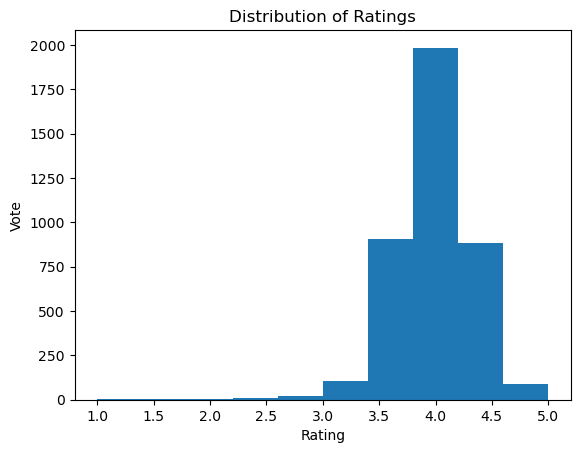

In [18]:
# Assuming you have a DataFrame called 'df' with columns 'vote' and 'rating'
# Replace 'df' with the actual name of your DataFrame

# Histogram
plt.hist(df_copy['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Vote')
plt.title('Distribution of Ratings')
plt.show()


C:\Users\יוכבד\AppData\Local\Temp\ipykernel_10064\651477857.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust spacing between labels


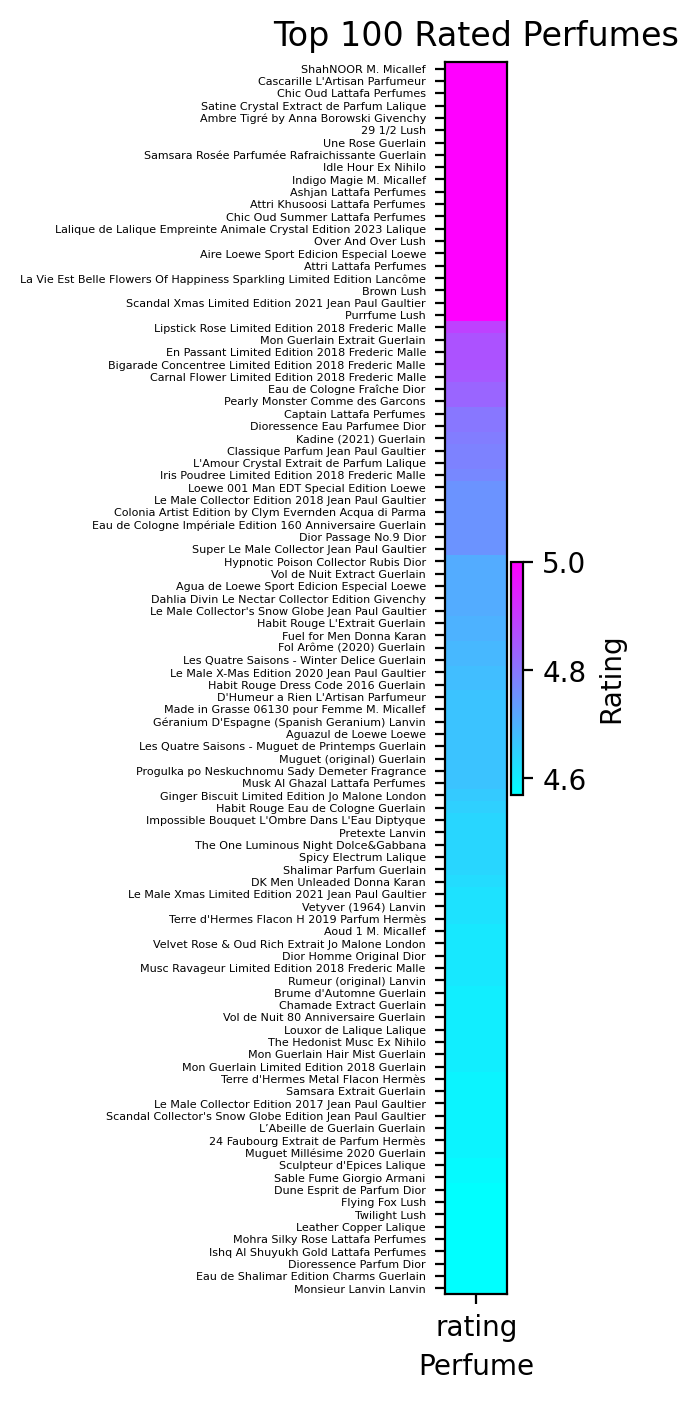

In [19]:
rating_heatmap = df_copy.pivot_table(values='rating', index='name', aggfunc='mean')

# Sort by rating column in descending order
rating_heatmap = rating_heatmap.sort_values(by='rating', ascending=False)

# Select the top 100 rows
rating_heatmap = rating_heatmap.head(100)

# Set the desired resolution
dpi = 200
fig_width = 0.5  # in inches
fig_height = 8  # in inches

plt.figure(figsize=(fig_width, fig_height), dpi=dpi)
plt.imshow(rating_heatmap, cmap='cool', interpolation='nearest', aspect='auto', extent=[-0.5, len(rating_heatmap.columns) - 0.5, len(rating_heatmap.index) - 0.5, -0.5])
plt.colorbar(label='Rating')
plt.xlabel('Perfume')
plt.title('Top 100 Rated Perfumes')
plt.yticks(range(len(rating_heatmap.index)), rating_heatmap.index, fontsize=4)
plt.xticks(range(len(rating_heatmap.columns)), rating_heatmap.columns)

plt.tight_layout()  # Adjust spacing between labels
plt.show()


C:\Users\יוכבד\AppData\Local\Temp\ipykernel_10064\4133282283.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust spacing between labels


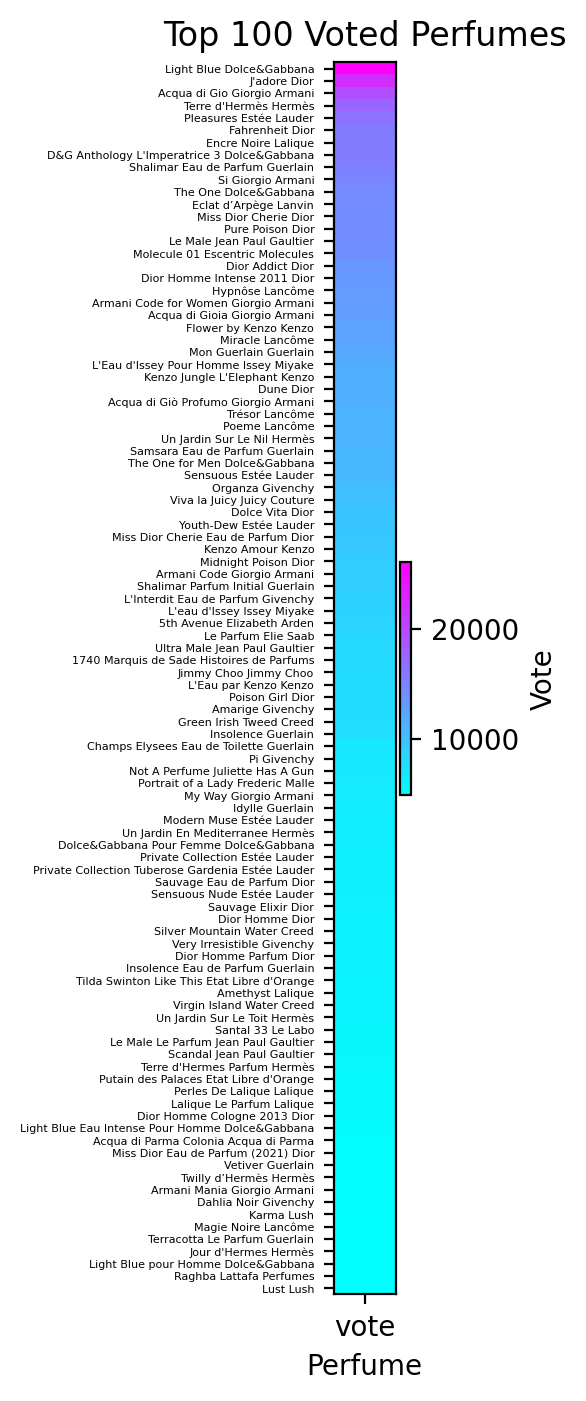

In [20]:
rating_heatmap = df_copy.pivot_table(values='vote', index='name', aggfunc='sum')

# Sort by vote column in descending order
rating_heatmap = rating_heatmap.sort_values(by='vote', ascending=False)

# Select the top 100 rows
rating_heatmap = rating_heatmap.head(100)

# Set the desired resolution
dpi = 200
fig_width = 0.5  # in inches
fig_height = 8  # in inches

plt.figure(figsize=(fig_width, fig_height), dpi=dpi)
plt.imshow(rating_heatmap, cmap='cool', interpolation='nearest', aspect='auto', extent=[-0.5, len(rating_heatmap.columns) - 0.5, len(rating_heatmap.index) - 0.5, -0.5])
plt.colorbar(label='Vote')
plt.xlabel('Perfume')
plt.title('Top 100 Voted Perfumes')
plt.yticks(range(len(rating_heatmap.index)), rating_heatmap.index, fontsize=4)
plt.xticks(range(len(rating_heatmap.columns)), rating_heatmap.columns)

plt.tight_layout()  # Adjust spacing between labels
plt.show()


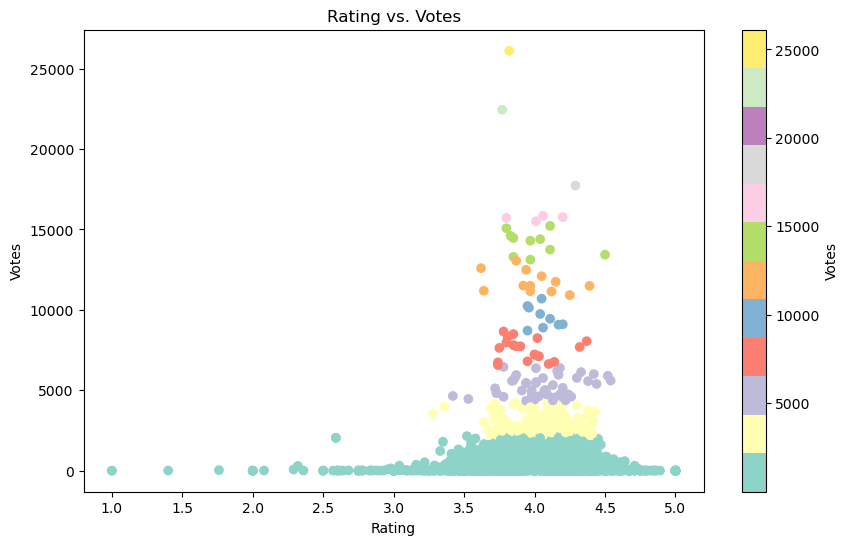

In [21]:
df_copy["vote"] = df_copy["vote"].replace(",", "", regex=True).astype(int)

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.scatter(df_copy["rating"], df_copy["vote"], c=df_copy["vote"], cmap="Set3")

# Set marker size and opacity
marker_size = 50
alpha = 0.7

# Set colorbar
colorbar = plt.colorbar()
colorbar.set_label('Votes')

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating vs. Votes')

plt.show()


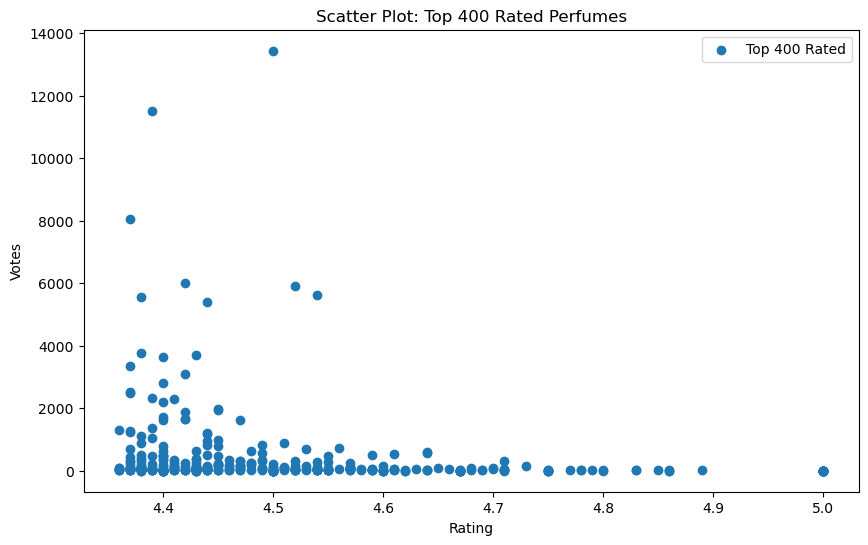

In [22]:
# Select the top 400 rated perfumes
top_rated = df_copy.nlargest(400, 'rating')

# Create a scatter plot for the top 400 rated perfumes
plt.figure(figsize=(10, 6))
plt.scatter(top_rated['rating'], top_rated['vote'], label='Top 400 Rated')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot: Top 400 Rated Perfumes')
plt.legend()
plt.show()




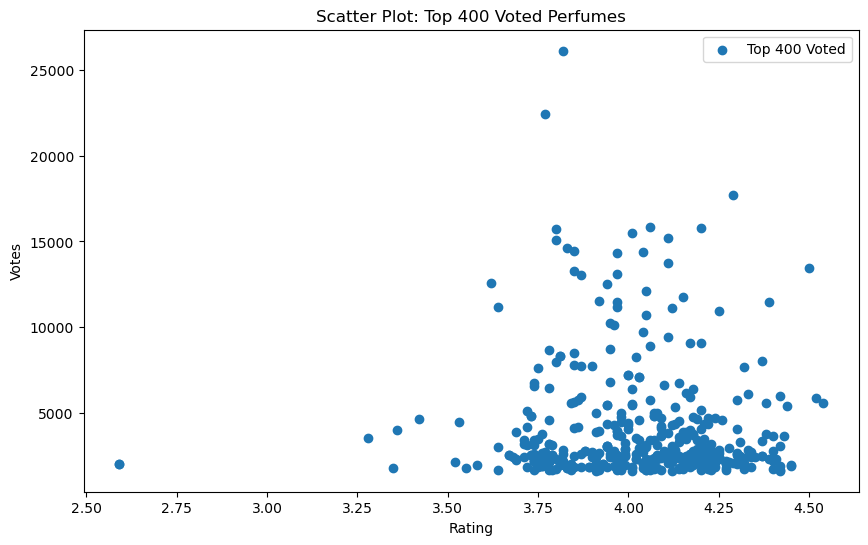

In [23]:
# Select the top 400 voted perfumes
top_voted = df_copy.nlargest(400, 'vote')

# Create a scatter plot for the top 400 voted perfumes
plt.figure(figsize=(10, 6))
plt.scatter(top_voted['rating'], top_voted['vote'], label='Top 400 Voted')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot: Top 400 Voted Perfumes')
plt.legend()
plt.show()

In [24]:
# Identify perfumes that are both top rated and top voted
common_perfumes = pd.merge(top_rated, top_voted, on='name', how='inner')
#print(common_perfumes.columns)
#print(common_perfumes)
print('Column names in top_rated:', top_rated.columns)
print('Column names in top_voted:', top_voted.columns)





Column names in top_rated: Index(['name', 'gender', 'rating', 'vote', 'very_weak_votes', 'weak_votes',
       'moderate1_votes', 'long_lasting_votes', 'eternal_votes',
       'intimate_votes', 'moderate2_votes', 'strong_votes', 'enormous_votes'],
      dtype='object')
Column names in top_voted: Index(['name', 'gender', 'rating', 'vote', 'very_weak_votes', 'weak_votes',
       'moderate1_votes', 'long_lasting_votes', 'eternal_votes',
       'intimate_votes', 'moderate2_votes', 'strong_votes', 'enormous_votes'],
      dtype='object')


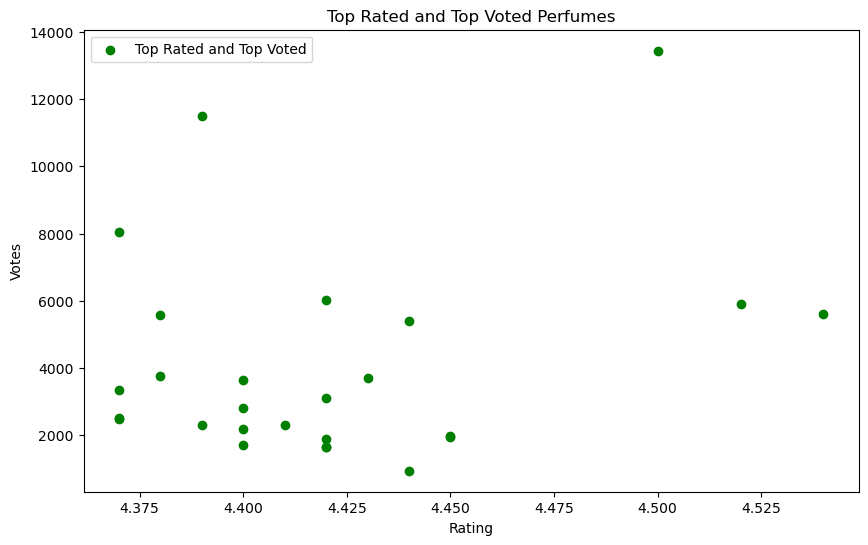

In [25]:
# Assuming you have the common_perfumes DataFrame and the correct column names

plt.figure(figsize=(10, 6))
plt.scatter(common_perfumes['rating_x'], common_perfumes['vote_x'], color='green', label='Top Rated and Top Voted')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Top Rated and Top Voted Perfumes')
plt.legend()
plt.show()


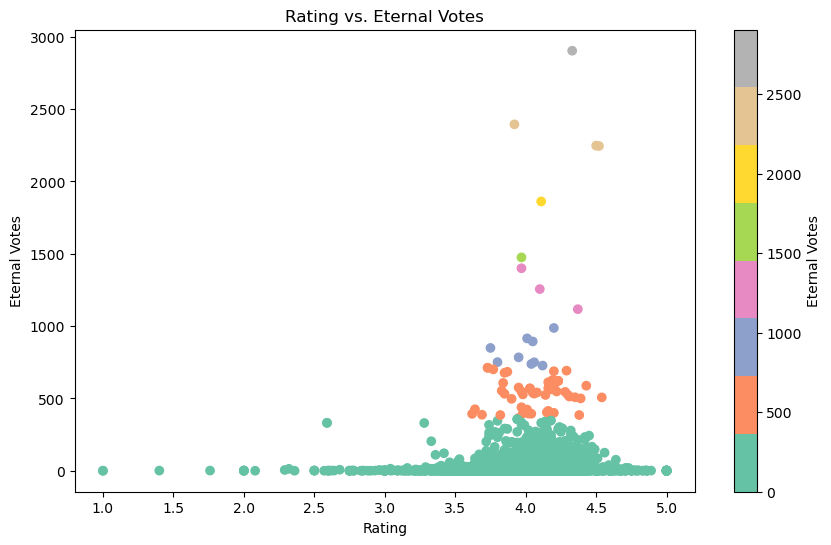

In [26]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_copy["rating"], df_copy["eternal_votes"], c=df_copy["eternal_votes"], cmap="Set2")

# Set marker size and opacity
marker_size = 50
alpha = 0.7

# Set colorbar
colorbar = plt.colorbar()
colorbar.set_label('Eternal Votes')

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Eternal Votes')
plt.title('Rating vs. Eternal Votes')

plt.show()


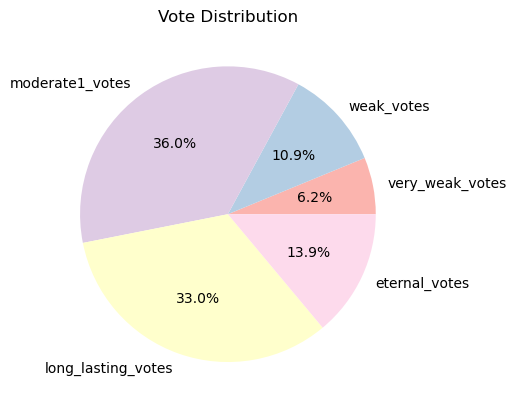

In [27]:
# Calculate the sum of votes for each category
sum_votes = df_copy[['very_weak_votes', 'weak_votes', 'moderate1_votes', 'long_lasting_votes', 'eternal_votes']].sum()

# Create a list of labels for the pie chart
labels = sum_votes.index.tolist()

# Create a list of sizes for the pie chart
sizes = sum_votes.tolist()

# Create a colormap for the pie chart
cmap = plt.cm.get_cmap('Pastel1')
colors = cmap(np.arange(len(labels)) / len(labels))

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Vote Distribution')

# Show the pie chart
plt.show()


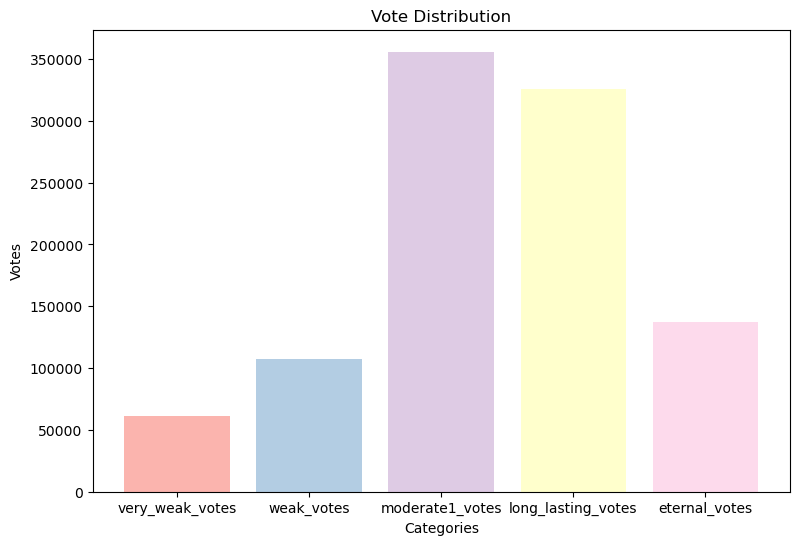

In [28]:
# Calculate the sum of votes for each category
sum_votes = df_copy[['very_weak_votes', 'weak_votes', 'moderate1_votes', 'long_lasting_votes', 'eternal_votes']].sum()

# Create a list of labels for the bar graph
labels = sum_votes.index.tolist()

# Create a list of sizes for the bar graph
sizes = sum_votes.tolist()

# Create a colormap for the bar graph
cmap = plt.cm.get_cmap('Pastel1')
colors = cmap(np.arange(len(labels)) / len(labels))

# Set the desired figure size
fig_width = 9
fig_height = 6

# Create the bar graph
plt.figure(figsize=(fig_width, fig_height))
plt.bar(labels, sizes, color=colors)
plt.xlabel('Categories')
plt.ylabel('Votes')
plt.title('Vote Distribution')

# Show the bar graph
plt.show()


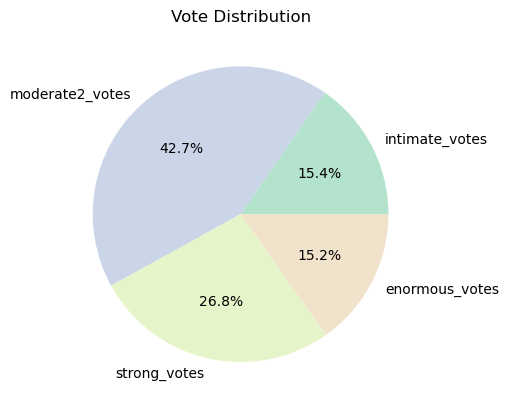

In [29]:
# Calculate the sum of votes for each category
sum_votes = df_copy[['intimate_votes', 'moderate2_votes', 'strong_votes', 'enormous_votes']].sum()

# Create a list of labels for the pie chart
labels = sum_votes.index.tolist()

# Create a list of sizes for the pie chart
sizes = sum_votes.tolist()

# Create a colormap for the pie chart
cmap = plt.cm.get_cmap('Pastel2')
colors = cmap(np.arange(len(labels)) / len(labels))

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Vote Distribution')

# Show the pie chart
plt.show()


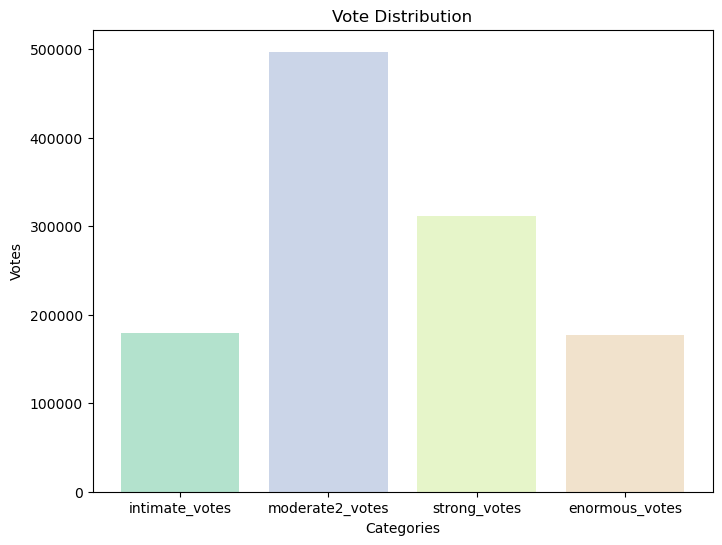

In [30]:
# Calculate the sum of votes for each category
sum_votes = df_copy[['intimate_votes', 'moderate2_votes', 'strong_votes', 'enormous_votes']].sum()

# Create a list of labels for the bar graph
labels = sum_votes.index.tolist()

# Create a list of sizes for the bar graph
sizes = sum_votes.tolist()

# Set colors for the bars
cmap = plt.cm.get_cmap('Pastel2')
colors = cmap(np.arange(len(labels)) / len(labels))

# Set the desired figure size
fig_width = 8
fig_height = 6

# Create the bar graph
plt.figure(figsize=(fig_width, fig_height))
plt.bar(labels, sizes, color=colors)
plt.xlabel('Categories')
plt.ylabel('Votes')
plt.title('Vote Distribution')

# Show the bar graph
plt.show()


Machine Learning

Supervised Learning


In [86]:
df_copy['clf_rating'] = 0
df_copy.loc[df_copy['rating'] > 3.78, 'clf_rating'] = 1



In [87]:
df_copy1=df_copy.copy()

In [88]:
df_copy1['clf_vote'] = 0
df_copy1.loc[df_copy1['vote'] > 500, 'clf_vote'] = 1



In [89]:
# Assuming you have a DataFrame called 'df'
save_as_csv(df_copy1, 'newOutoutForSHIRIN.csv')

In [90]:
df_copy1=df_copy1.drop(['name','rating'],axis=1)

In [91]:
df_copy1

,gender,vote,very_weak_votes,weak_votes,moderate1_votes,long_lasting_votes,eternal_votes,intimate_votes,moderate2_votes,strong_votes,enormous_votes,clf_rating,clf_vote
0,2,2603,95,226,601,136,26,304,711,137,115,1,1
1,2,1093,29,58,204,73,24,89,247,101,77,1,1
2,2,2603,95,226,601,136,26,304,711,137,115,1,1
3,2,1093,29,58,204,73,24,89,247,101,77,1,1
4,1,12,1,0,2,0,0,2,5,4,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,1,10,0,2,3,1,0,3,3,0,0,1,0
4004,1,40,2,4,15,2,1,11,17,0,1,1,0
4005,1,11,1,7,1,0,0,4,4,1,0,1,0
4006,1,83,3,9,14,3,0,13,13,2,2,0,0


In [92]:
# Split the data into input features (X) and target variable (y)
X = df_copy1.drop('clf_rating', axis=1)
y = df_copy1['clf_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
rfc_pred = rfc.predict(X_test)
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8039950062421972


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.69      0.30      0.42       188
           1       0.82      0.96      0.88       613

    accuracy                           0.80       801
   macro avg       0.75      0.63      0.65       801
weighted avg       0.79      0.80      0.77       801



In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Split the data into input features (X) and target variable (y)
X = df_copy1.drop('clf_rating', axis=1)
y = df_copy1['clf_rating']

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(max_depth=8, max_features=2, min_samples_leaf=4, n_estimators=50)

# Perform 10-fold cross-validation
num_folds = 10
cv_scores = cross_val_score(rfc, X, y, cv=num_folds)

# Print the cross-validation scores for each fold
for fold, score in enumerate(cv_scores):
    print(f"Fold {fold+1}: {score}")

# Calculate the average accuracy across all folds
avg_accuracy = cv_scores.mean()
print(f"Average Accuracy: {avg_accuracy}")


Fold 1: 0.7655860349127181
Fold 2: 0.7630922693266833
Fold 3: 0.743142144638404
Fold 4: 0.7680798004987531
Fold 5: 0.770573566084788
Fold 6: 0.7675
Fold 7: 0.77
Fold 8: 0.7825
Fold 9: 0.78
Fold 10: 0.675
Average Accuracy: 0.7585473815461347


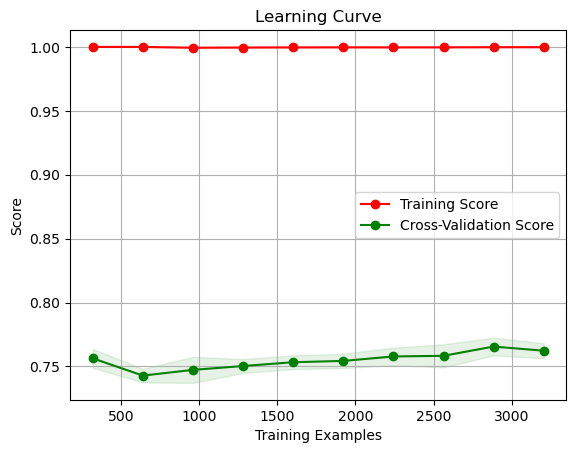

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, train_sizes, cv):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
    
    plt.legend(loc='best')
    return plt

# Define the estimator (e.g., RandomForestClassifier)
estimator = RandomForestClassifier()

# Define the training examples sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Plot the learning curve
plot_learning_curve(estimator, X, y, train_sizes, cv=5)

plt.show()


In [102]:


# Split the data into input features (X) and target variable (y)
X = df_copy1.drop('clf_rating', axis=1)
y = df_copy1['clf_rating']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns


# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Split the encoded data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Define and train the Support Vector Classifier
svc = SVC(kernel='rbf', C=1.0, gamma='scale')
svc.fit(X_train, y_train)

# Make predictions on the test data
svc_pred = svc.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, svc_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7720465890183028


In [103]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       274
           1       0.77      1.00      0.87       928

    accuracy                           0.77      1202
   macro avg       0.39      0.50      0.44      1202
weighted avg       0.60      0.77      0.67      1202



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into input features (X) and target variable (y)
X = df_copy1.drop('clf_rating', axis=1)
y = df_copy1['clf_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
knn_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy)


Accuracy: 0.742928452579035


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [105]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.40      0.21      0.28       278
           1       0.79      0.90      0.84       924

    accuracy                           0.74      1202
   macro avg       0.59      0.56      0.56      1202
weighted avg       0.70      0.74      0.71      1202



In [107]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into input features (X) and target variable (y)
X = df_copy1.drop('clf_rating', axis=1)
y = df_copy1['clf_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

# Fit the classifier to the training data
mlp.fit(X_train, y_train)

# Make predictions on the test data
mlp_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, mlp_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7640449438202247


In [108]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.33      0.01      0.01       188
           1       0.77      1.00      0.87       613

    accuracy                           0.76       801
   macro avg       0.55      0.50      0.44       801
weighted avg       0.66      0.76      0.67       801



In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into input features (X) and target variable (y)
X = df_copy1.drop('clf_rating', axis=1)
y = df_copy1['clf_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LogisticRegression classifier
logreg = LogisticRegression(random_state=42)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
logreg_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, logreg_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7590511860174781


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.39      0.05      0.09       188
           1       0.77      0.98      0.86       613

    accuracy                           0.76       801
   macro avg       0.58      0.51      0.47       801
weighted avg       0.68      0.76      0.68       801

